In [146]:
import qiskit
import matplotlib
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

In [147]:
#Secret number we want to find
secretnum = '1011'

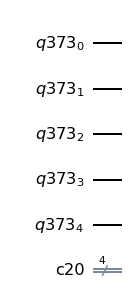

In [148]:
qr = qiskit.QuantumRegister(len(secretnum)+1)
cr = qiskit.ClassicalRegister(len(secretnum))
circuit = qiskit.QuantumCircuit(qr, cr)

circuit.draw(output='mpl')

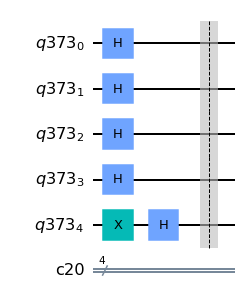

In [149]:
#1. Apply Hadamard gate except the last qubit
circuit.h(range(len(secretnum)))

#2. Apply CNOT and then Hadamard to the last qubit
circuit.x(qr[len(secretnum)])
circuit.h(qr[len(secretnum)])
circuit.barrier()

circuit.draw(output='mpl')

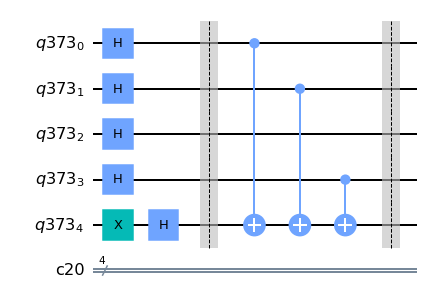

In [150]:
#3. Apply CNOT with control as qubits with value 1 and target as last qubit
secretnum_rev = secretnum[::-1]     # Need to reverse the string
for i in range(len(secretnum)):
    if secretnum_rev[i] == '1':
        circuit.cnot(qr[i], qr[len(secretnum)])

circuit.barrier()

circuit.draw(output='mpl')

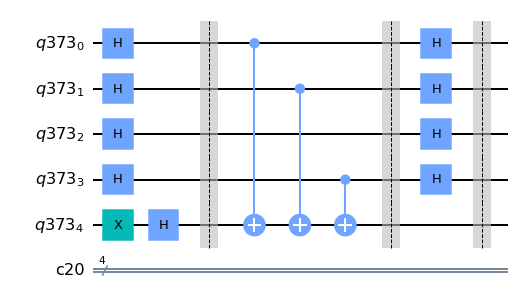

In [151]:
#4. Draw Hadamard gates for all the qubits
circuit.h(range(len(secretnum)))
circuit.barrier()

circuit.draw(output='mpl')

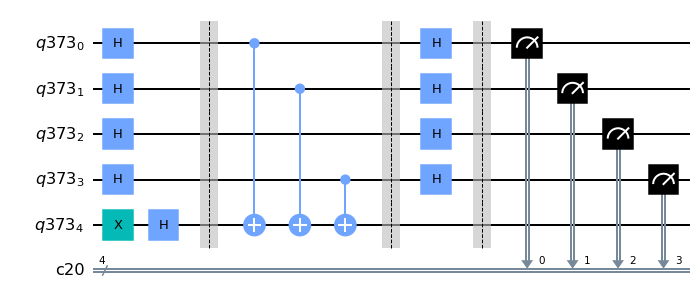

In [152]:
#Measure the values
circuit.measure(qr[0:-1], cr)

circuit.draw(output='mpl')

{'1011': 1}


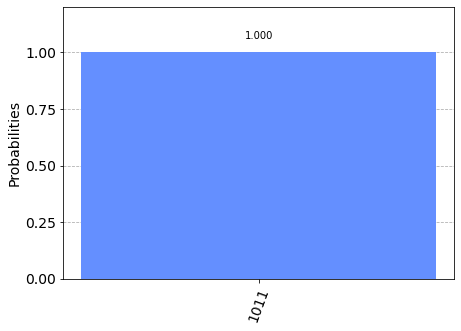

In [153]:
result = qiskit.execute(circuit, backend=qiskit.Aer.get_backend('qasm_simulator'), shots=1).result()    #Algorithm finds the number in 1 shot
print(result.get_counts())
plot_histogram(result.get_counts(circuit))